# Getting Started


Here we go through a complete rocket trajectory simulation to get you started.

Also, a more in detail complete description of the simulation can also be found in the [First Simulation Section of the RocketPy Documentation](https://docs.rocketpy.org/en/latest/user/first_simulation.html).

If you want, you can open this notebook in Google Colab by clicking the badge below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RocketPy-Team/rocketpy/blob/master/docs/notebooks/getting_started_colab.ipynb)

Let's start by importing the rocketpy module.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.


In [3]:
# %matplotlib widget

## Setting Up a Simulation


### Creating an Environment for Spaceport America

The `Environment` class is used to define the atmosphere, the winds, and the gravity models.

You can find more information about the `Environment` class in the [Environment Class Usage Docs](https://docs.rocketpy.org/en/latest/notebooks/environment/environment_class_usage.html).


In [4]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

To get weather data from the GFS forecast, available online, we run the following lines.

First, we set tomorrow's date.


In [5]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

Then, we tell env to use a GFS forecast to get the atmospheric conditions for flight.

Don't mind the warning, it just means that not all variables, such as wind speed or atmospheric temperature, are available at all altitudes given by the forecast.


In [6]:
# env.set_atmospheric_model(type="custom_atmosphere", wind_u=0, wind_v=5)

We can see what the weather will look like by calling the info method!


In [7]:
env.max_expected_height = 5000  # adjust the plots to this height
# env.all_info()

In [8]:
# IMPORTANT: modify the file path below to match your own system

Pro75M1670 = SolidMotor(
    thrust_source="../../data/motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

**Pay special attention to _position_ related parameters:**
More details on [Positions and Coordinate Systems](https://docs.rocketpy.org/en/latest/user/positions.html)


To see what our thrust curve looks like, along with other import properties, we invoke the info method yet again. You may try the all_info method if you want more information all at once!


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



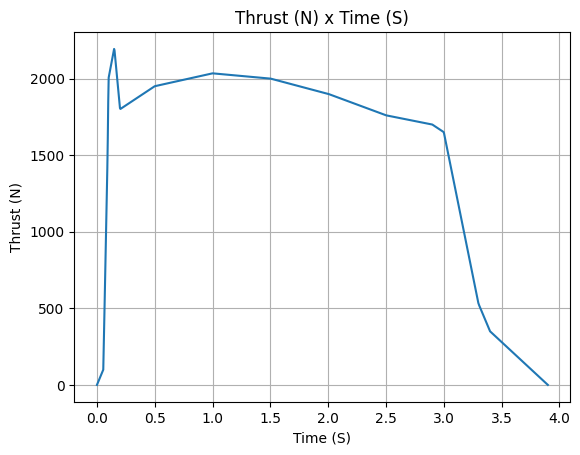

In [9]:
Pro75M1670.info()

In [10]:
# Main = calisto.add_parachute(
#     "Main",
#     cd_s=10.0,
#     trigger=800,
#     sampling_rate=105,
#     lag=1.5,
#     noise=(0, 8.3, 0.5),
# )

# Drogue = calisto.add_parachute(
#     "Drogue",
#     cd_s=1.0,
#     trigger="apogee",
#     sampling_rate=105,
#     lag=1.5,
#     noise=(0, 8.3, 0.5),
# )

In [11]:
# IMPORTANT: modify the file paths below to match your own system

calisto_std = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto_std.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)
calisto_std.add_motor(Pro75M1670, position=-1.255)


nose_cone = calisto_std.add_nose(length=0.55829, kind="vonKarman", position=1.278)

# IMPORTANT: modify the file path below to match your own system
fin_set = calisto_std.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../../data/calisto/NACA0012-radians.csv", "radians"),
    name="FinSet",
)


tail = calisto_std.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

In [12]:
# IMPORTANT: modify the file paths below to match your own system

calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)
calisto.add_motor(Pro75M1670, position=-1.255)


nose_cone = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../../data/calisto/NACA0012-radians.csv", "radians"),
    name="FinSet",
)


tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

from rocketpy import GenericSurface, Function
import numpy as np

gennose = GenericSurface(
    reference_area=np.pi * calisto.radius**2,
    reference_length=2 * calisto.radius,
    coefficients={
        "cL": "nose_cL.csv",
        "cQ": "nose_cQ.csv",
    },
    center_of_pressure=(0, 0, 0),
    name="nose",
)
genfin = GenericSurface(
    reference_area=np.pi * calisto.radius**2,
    reference_length=2 * calisto.radius,
    coefficients={
        "cL": "fins_cL.csv",
        "cQ": "fins_cQ.csv",
        "cl": "fins_roll.csv",
    },
    center_of_pressure=(0, 0, 0),
    name="fins",
)
gentail = GenericSurface(
    reference_area=np.pi * calisto.radius**2,
    reference_length=2 * calisto.radius,
    coefficients={
        "cL": "tail_cL.csv",
        "cQ": "tail_cQ.csv",
    },
    center_of_pressure=(0, 0, 0),
    name="tail",
)

posnose = 1.278 - nose_cone.cpz
posfin = -1.04956 - fin_set.cpz
postail = -1.194656 - tail.cpz
calisto.aerodynamic_surfaces.pop()
calisto.aerodynamic_surfaces.pop()
calisto.aerodynamic_surfaces.pop()
calisto.add_surfaces(gennose, positions=(0, 0, posnose))
calisto.add_surfaces(genfin, positions=(0, 0, posfin))
calisto.add_surfaces(gentail, positions=(0, 0, postail))

c:\mateus\github\rocketpy\rocketpy\mathutils\function.py:3359: UserWarning: Extrapolation 'natural' is not supported for multidimensional linear interpolation. 'rbf' will be used to extrapolate.
  warnings.warn(


In [13]:
import numpy as np


def std():
    """Function to extract the coefficients from standard aerosurfaces"""
    # call nose_cone.cl at several mach and alpha and save it to a csv file
    lower_mach = 0
    upper_mach = 3
    mach_step = 0.5
    # list of machs using np
    machs = np.arange(lower_mach, upper_mach + mach_step, mach_step)
    lower_alpha = -np.deg2rad(12)
    upper_alpha = np.deg2rad(12)
    alpha_step = np.deg2rad(6)
    alphas = np.arange(lower_alpha, upper_alpha + alpha_step, alpha_step)
    with open("nose_cL.csv", "w") as f:
        f.write("alpha,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = nose_cone.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")

    with open("nose_cQ.csv", "w") as f:
        f.write("beta,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = nose_cone.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")

    with open("fins_cL.csv", "w") as f:
        f.write("alpha,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = fin_set.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")

    with open("fins_cQ.csv", "w") as f:
        f.write("beta,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = fin_set.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")

    clf_delta, cld_omega, _ = fin_set.roll_parameters

    def cll(mach, roll_rate):
        if mach == 0:
            return clf_delta(mach) * fin_set.cant_angle_rad
        return (
            clf_delta(mach) * fin_set.cant_angle_rad
            - fin_set.reference_length / (2 * mach * 343) * cld_omega(mach) * roll_rate
        )

    cl = Function(lambda mach, roll_rate: cll(mach, roll_rate))
    lower_mach_cl = 0
    upper_mach_cl = 3
    mach_step_cl = 0.5
    # list of machs using np
    machs_cl = np.arange(lower_mach_cl, upper_mach_cl + mach_step_cl, mach_step_cl)
    with open("fins_roll.csv", "w") as f:
        f.write("mach,roll_rate,cl\n")
        for mach in machs_cl:
            for roll_rate in np.linspace(-40, 40, 10):
                cL = cl(mach, roll_rate)
                f.write(f"{mach},{roll_rate},{cL}\n")

    with open("tail_cL.csv", "w") as f:
        f.write("alpha,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = tail.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")

    with open("tail_cQ.csv", "w") as f:
        f.write("beta,mach,cL\n")
        for alpha in alphas:
            for mach in machs:
                cL = tail.cl(alpha, mach)
                f.write(f"{alpha},{mach},{cL}\n")


# std()

In [14]:
calisto.aerodynamic_surfaces

Components:
	Component: <rocketpy.rocket.aero_surface.generic_surface.GenericSurface object at 0x000001C0F72ABE10> Position: (0, 0, 0.998855)
	Component: <rocketpy.rocket.aero_surface.generic_surface.GenericSurface object at 0x000001C0F72F9C10> Position: (0, 0, -1.09956)
	Component: <rocketpy.rocket.aero_surface.generic_surface.GenericSurface object at 0x000001C0F72FAC10> Position: (0, 0, -1.2227868411214953)

In [15]:
test_flight_std = Flight(
    rocket=calisto_std,
    environment=env,
    rail_length=5.2,
    inclination=85,
    heading=0,
    terminate_on_apogee=True,
    # max_time=6,
    # max_time_step=0.1,
    # time_overshoot=False,
)
test_flight = Flight(
    rocket=calisto,
    environment=env,
    rail_length=5.2,
    inclination=85,
    heading=0,
    terminate_on_apogee=True,
    # max_time=6,
    # max_time_step=0.1,
    # time_overshoot=False,
)

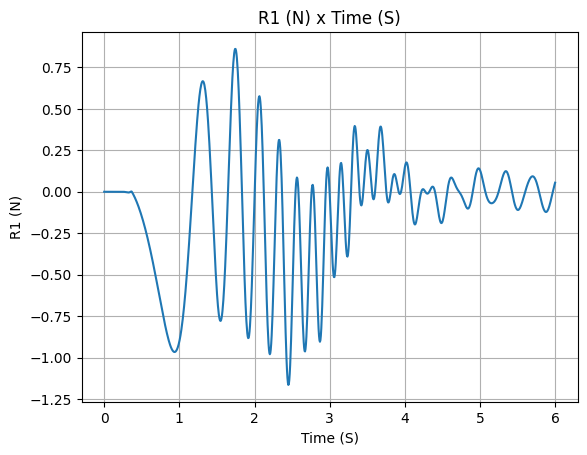

In [17]:
%matplotlib inline
test_flight_std.R1.plot(0, 6)

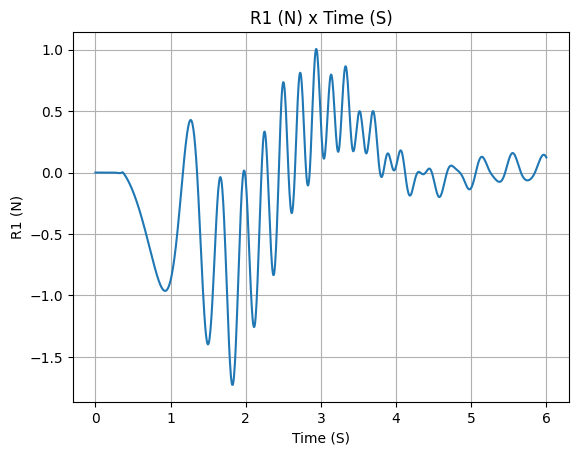

In [18]:
test_flight.R1.plot(0, 6)

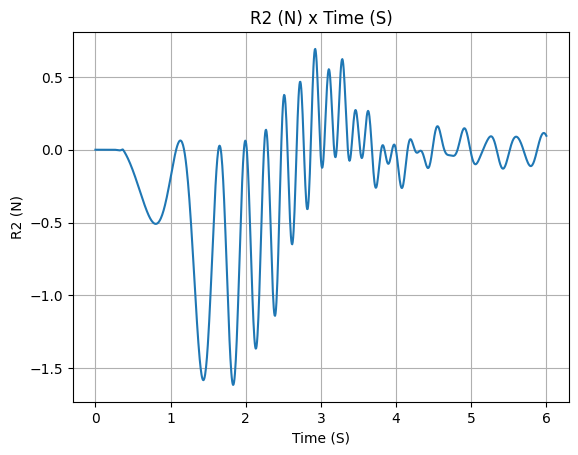

In [19]:
test_flight_std.R2.plot(0, 6)

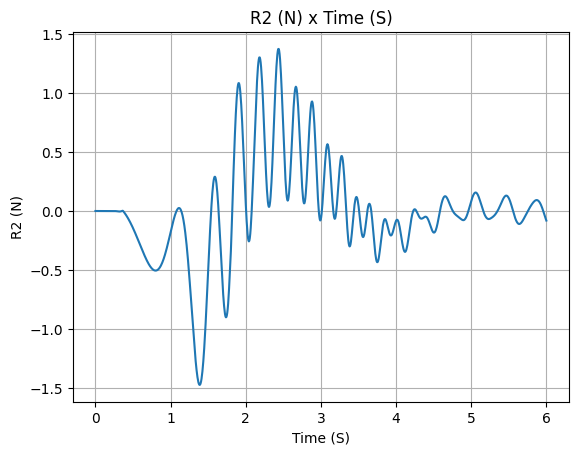

In [20]:
test_flight.R2.plot(0, 6)

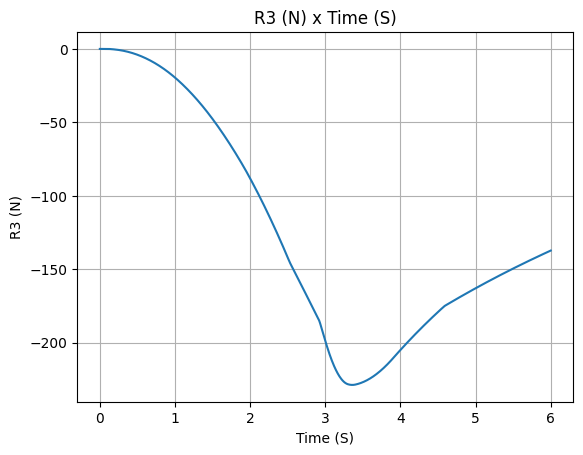

In [21]:
test_flight_std.R3.plot(0, 6)

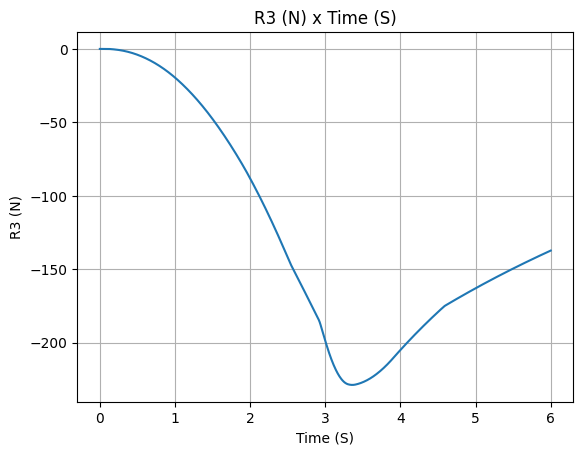

In [22]:
test_flight.R3.plot(0, 6)

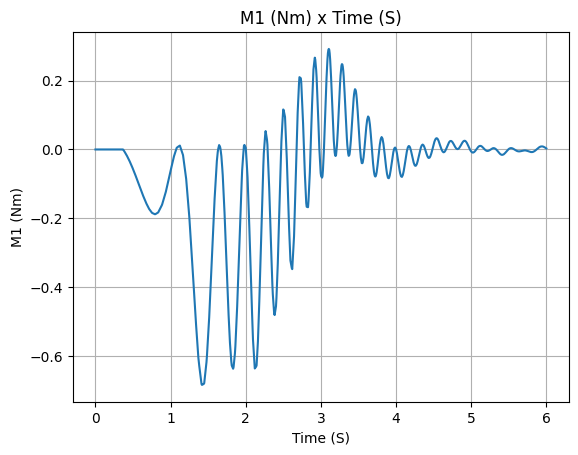

In [23]:
test_flight_std.M1.plot(0, 6)

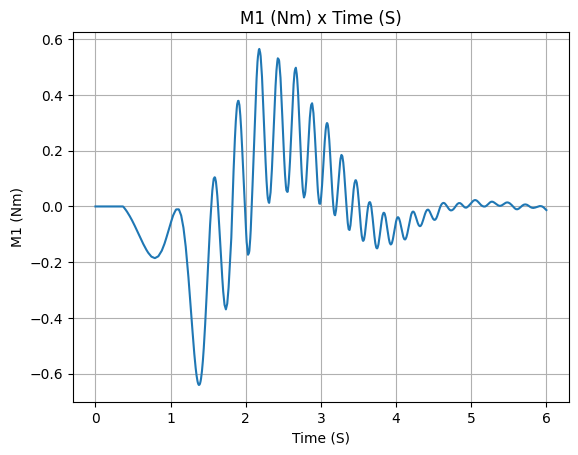

In [24]:
test_flight.M1.plot(0, 6)

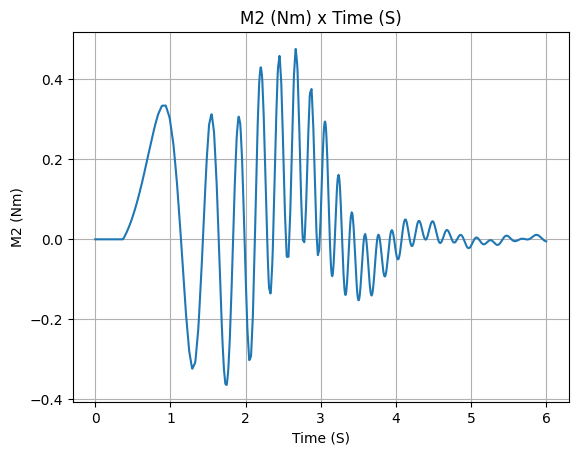

In [25]:
test_flight_std.M2.plot(0, 6)

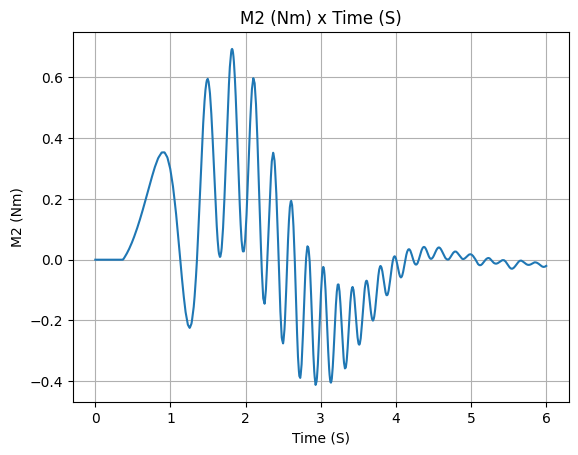

In [26]:
test_flight.M2.plot(0, 6)

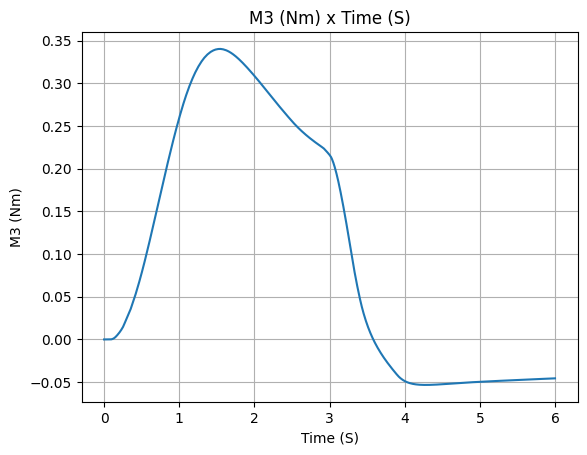

In [27]:
test_flight_std.M3.plot(0, 6)

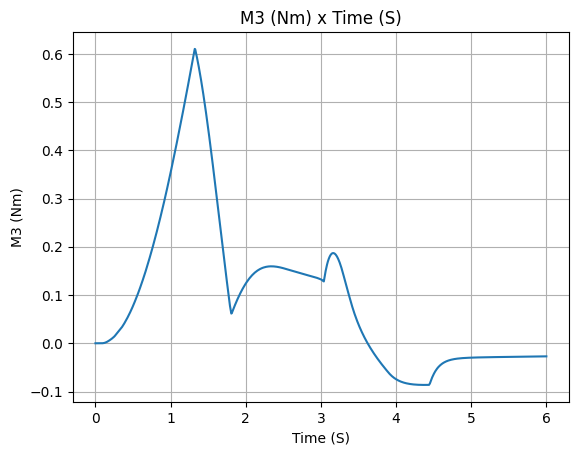

In [28]:
test_flight.M3.plot(0, 6)

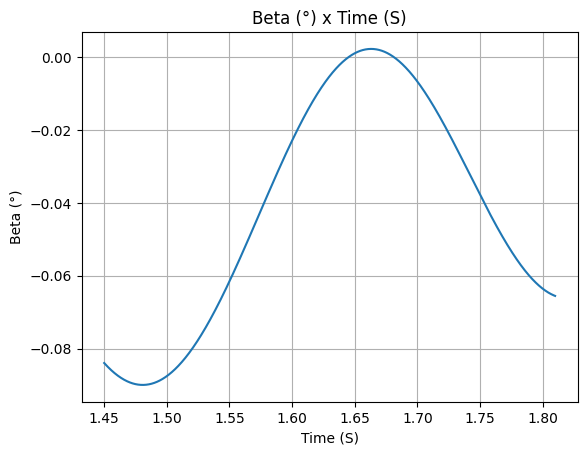

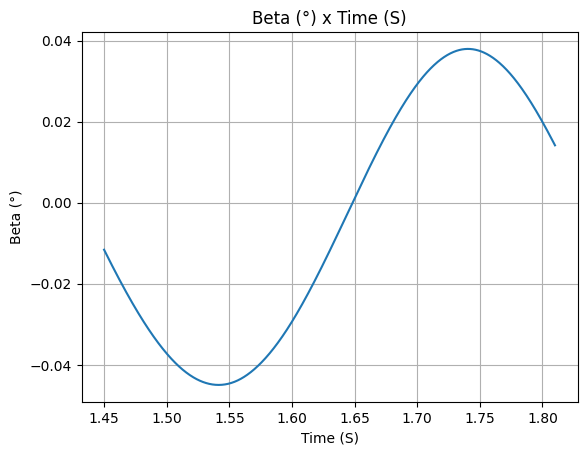

In [95]:
test_flight.angle_of_sideslip.plot(1.45, 1.81)
test_flight_std.angle_of_sideslip.plot(1.45, 1.81)

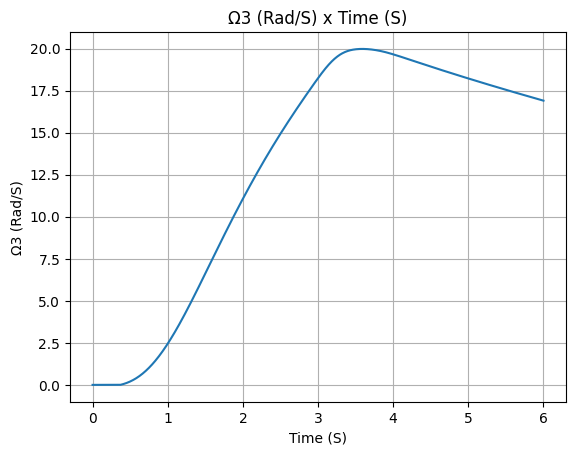

In [44]:
test_flight_std.w3.plot(0, 6)

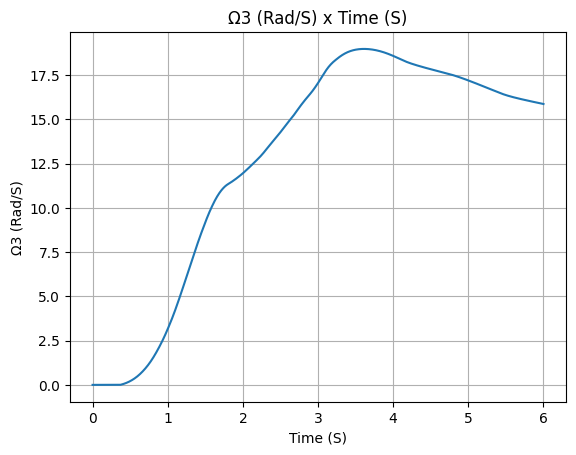

In [45]:
test_flight.w3.plot(0, 6)

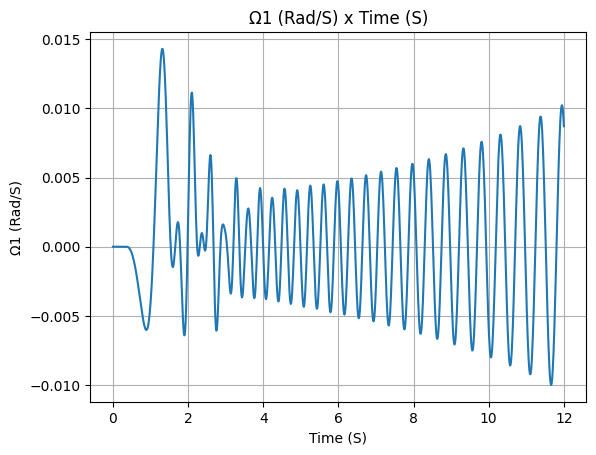

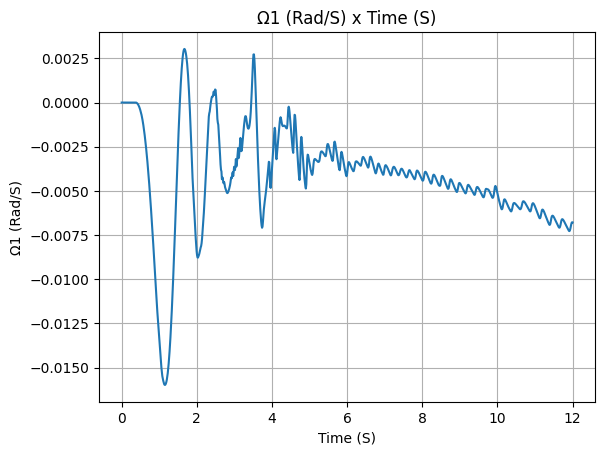

In [151]:
test_flight_std.w1.plot(0, 12)
test_flight.w1.plot(0, 12)

In [36]:
test_flight_std.z(6), test_flight.z.y_array[-1], test_flight_std.x(
    6
), test_flight.x.y_array[-1], test_flight_std.y(6), test_flight.y.y_array[-1]

(np.float64(2595.414087546087),
 np.float64(4705.428231531563),
 np.float64(0.08950288140075283),
 np.float64(0.552138076334713),
 np.float64(129.64860875872213),
 np.float64(589.3826217723959))

In [152]:
test_flight_std.apogee, test_flight.apogee, test_flight_std.apogee_x, test_flight.apogee_x, test_flight_std.apogee_y, test_flight.apogee_y

(np.float64(4705.541489451993),
 np.float64(4705.418544327971),
 np.float64(0.2968549600398274),
 np.float64(0.5500029712844984),
 np.float64(588.7861750506365),
 np.float64(589.4205244954754))

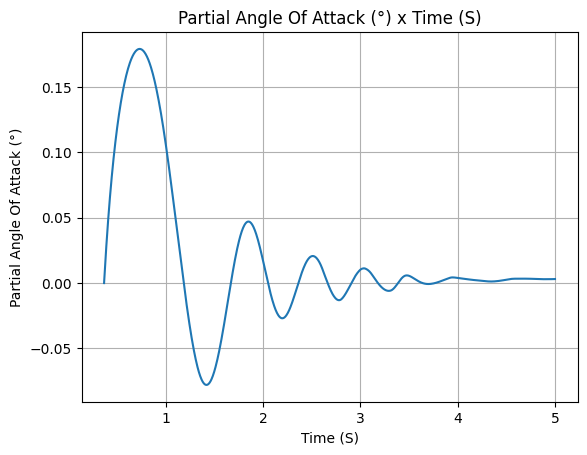

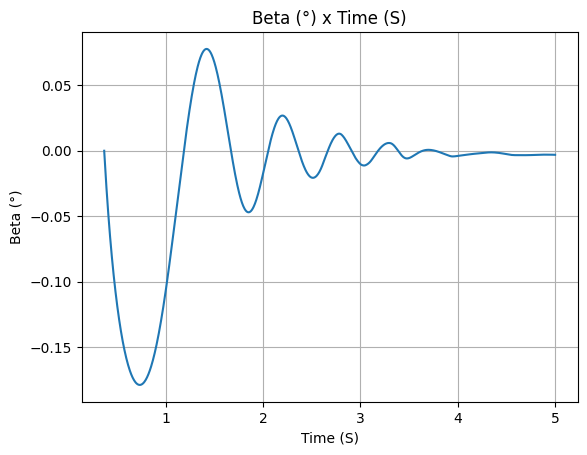

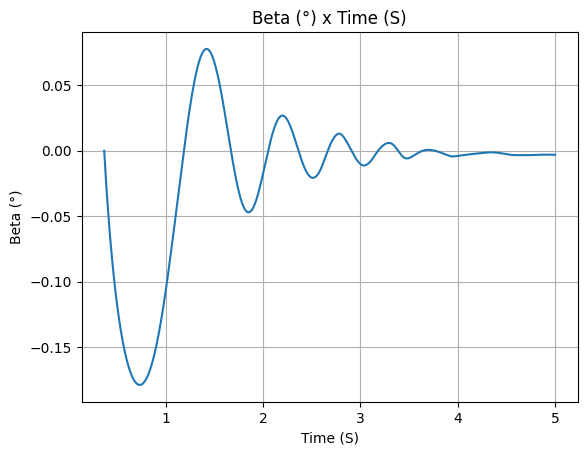

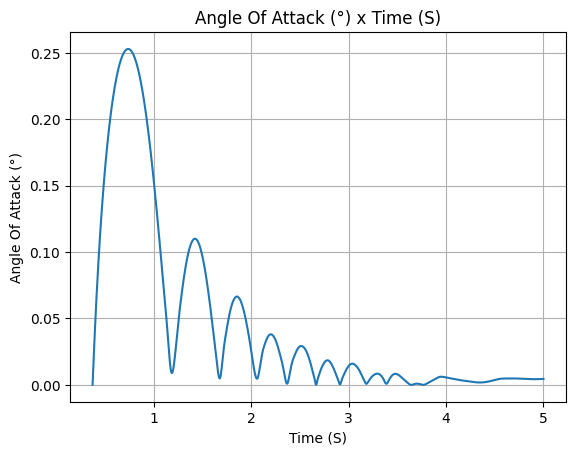

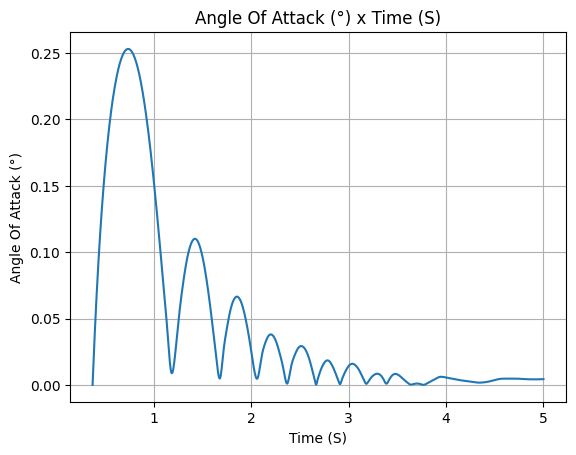

In [85]:
test_flight.partial_angle_of_attack.plot(test_flight.out_of_rail_time, 5)
test_flight.angle_of_sideslip.plot(test_flight.out_of_rail_time, 5)
test_flight.angle_of_sideslip2.plot(test_flight.out_of_rail_time, 5)
test_flight.angle_of_attack.plot(test_flight.out_of_rail_time, 5)
test_flight.angle_of_attack2.plot(test_flight.out_of_rail_time, 5)

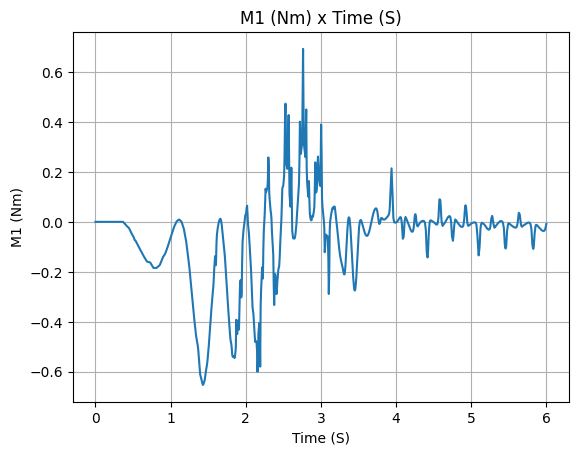

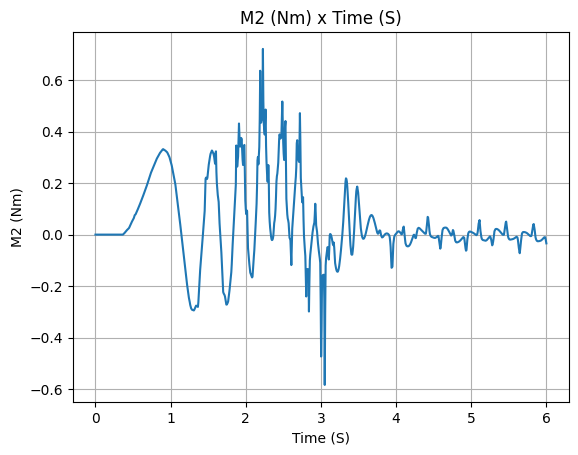

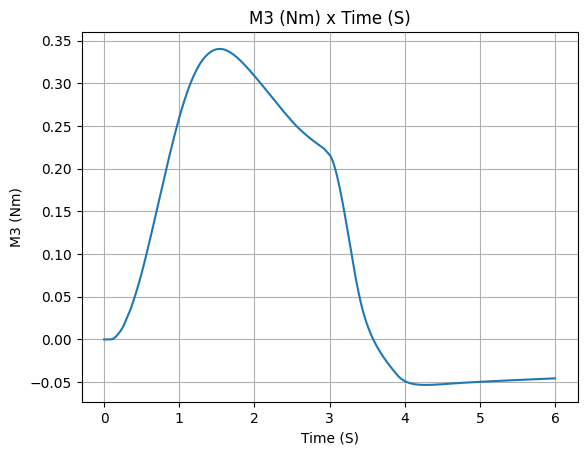

In [74]:
%matplotlib inline
test_flight.M1.plot(0, 6)
test_flight.M2.plot(0, 6)
test_flight.M3.plot(0, 6)

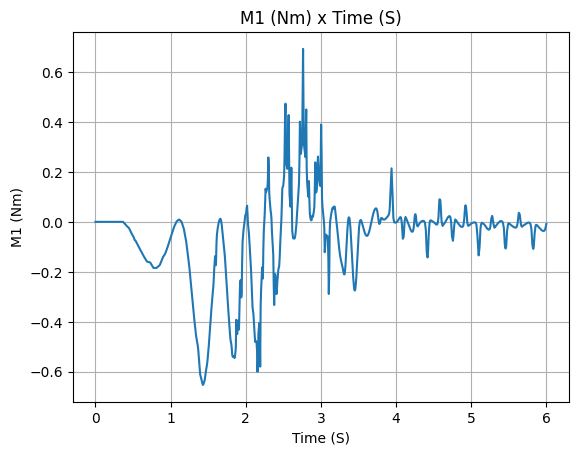

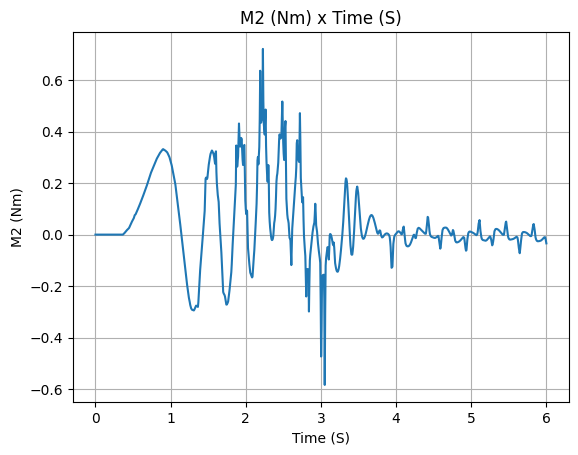

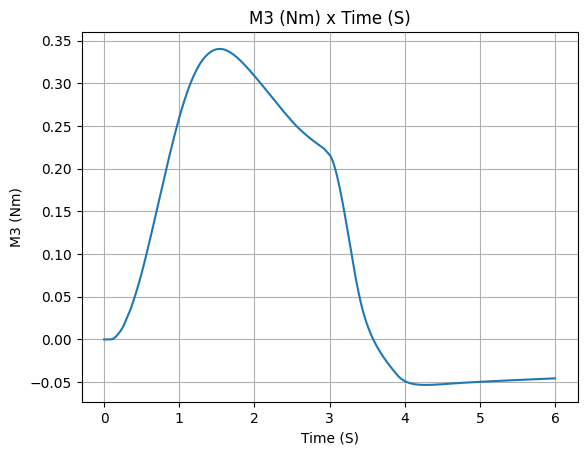

In [67]:
%matplotlib inline
test_flight.M1.plot(0, 6)
test_flight.M2.plot(0, 6)
test_flight.M3.plot(0, 6)

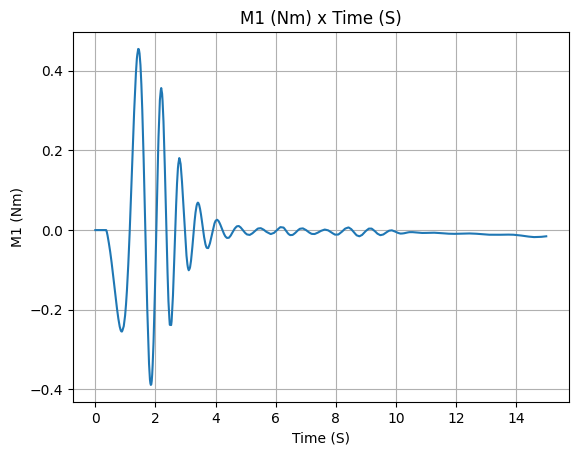

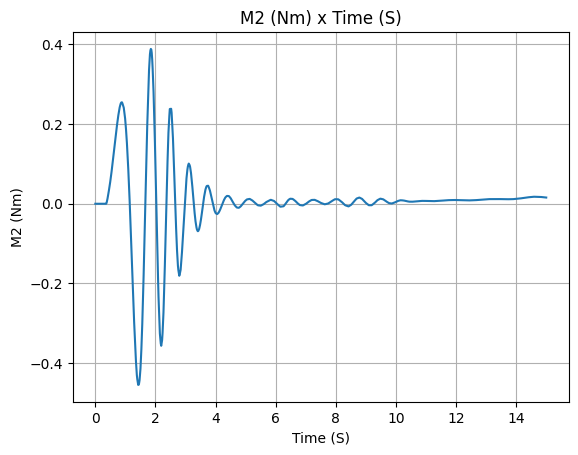

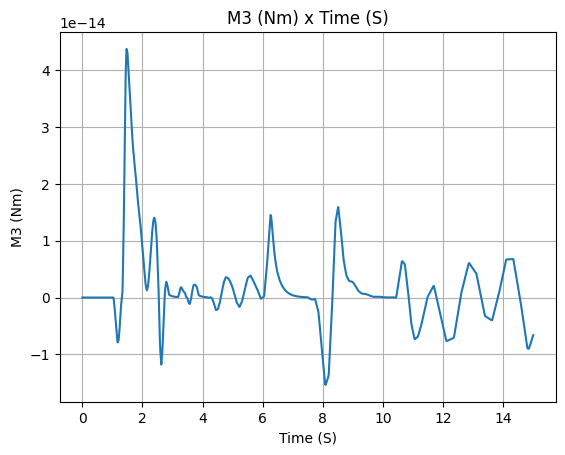

In [83]:
%matplotlib inline
test_flight.M1.plot(0, 15)
test_flight.M2.plot(0, 15)
test_flight.M3.plot(0, 15)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.923 | e1: -0.040 | e2: 0.017 | e3: 0.382
Euler Angles - Spin φ : 45.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.199 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 5.2 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.207 m/s
Rail Departure Stability Margin: 2.264 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 2.040e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 2057.356 m (ASL) | 657.356 m (AGL)
Rocket speed at burn out: 279.647 m/s
Freestream veloc

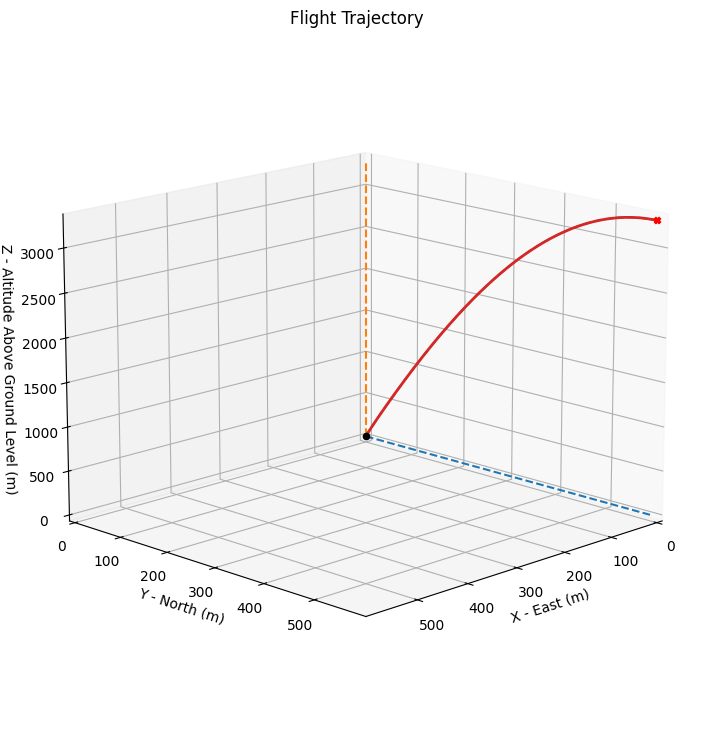



Trajectory Kinematic Plots



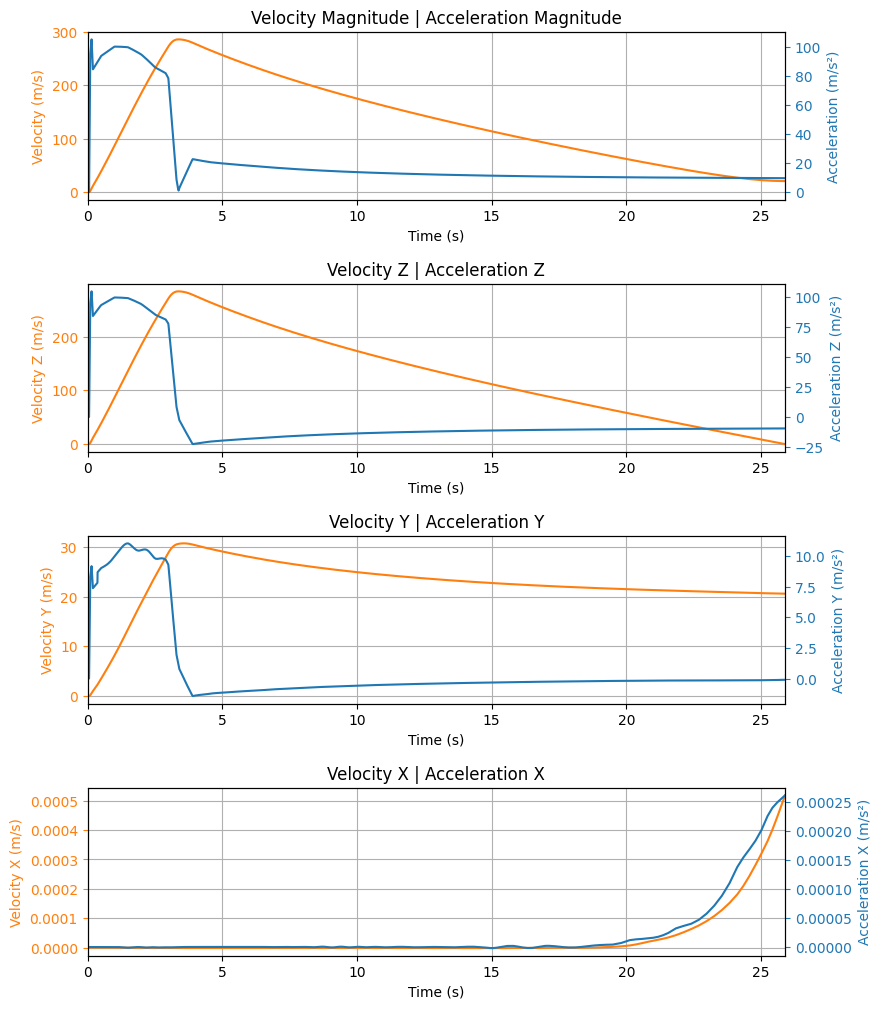



Angular Position Plots



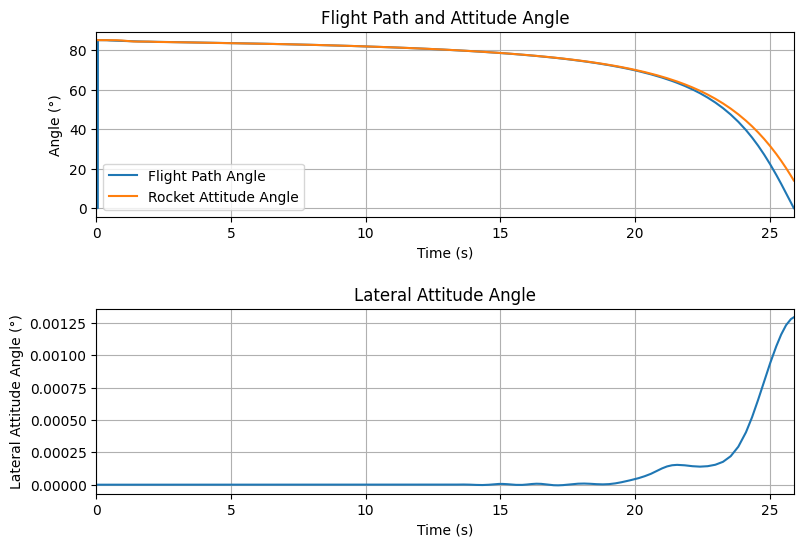



Path, Attitude and Lateral Attitude Angle plots



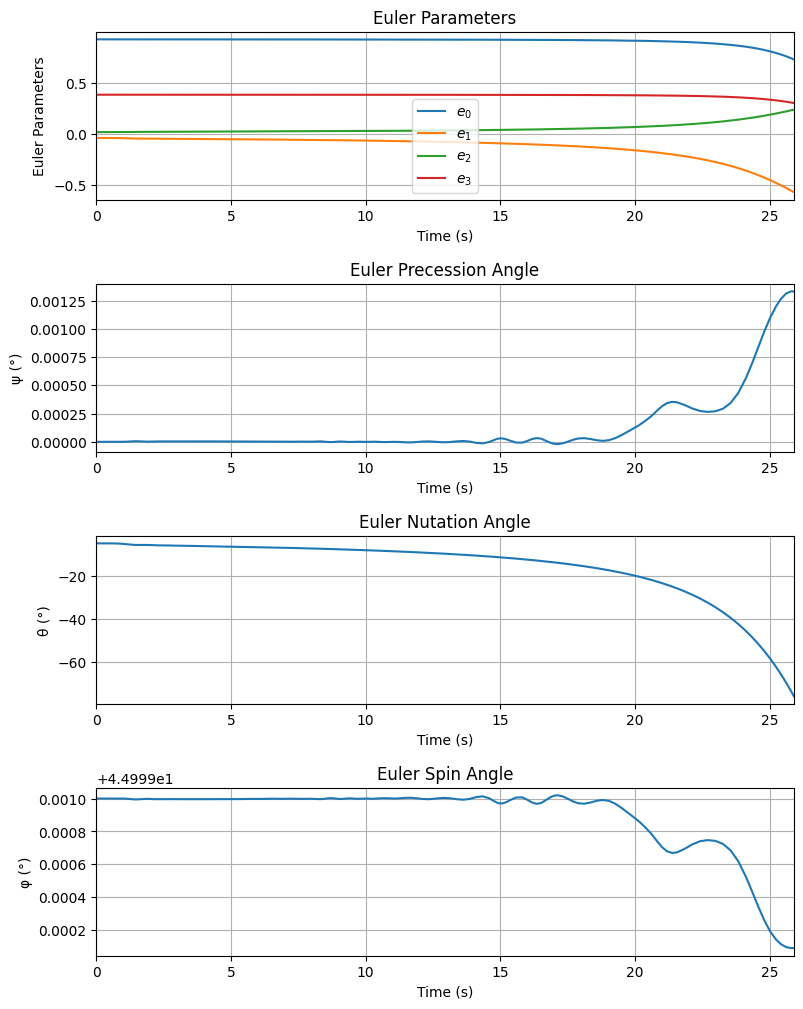



Trajectory Angular Velocity and Acceleration Plots



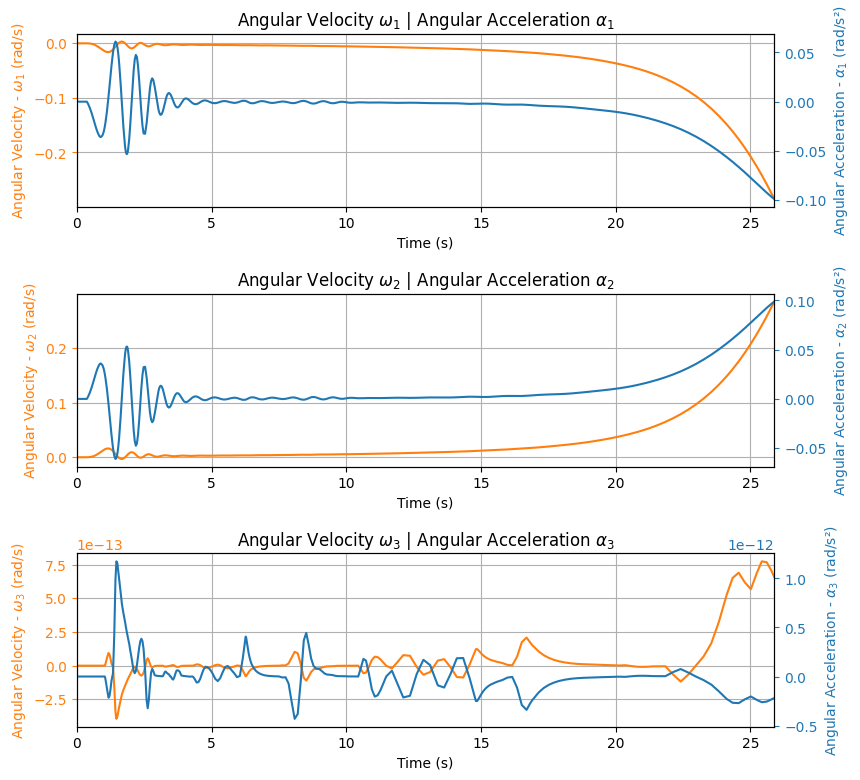



Aerodynamic Forces Plots



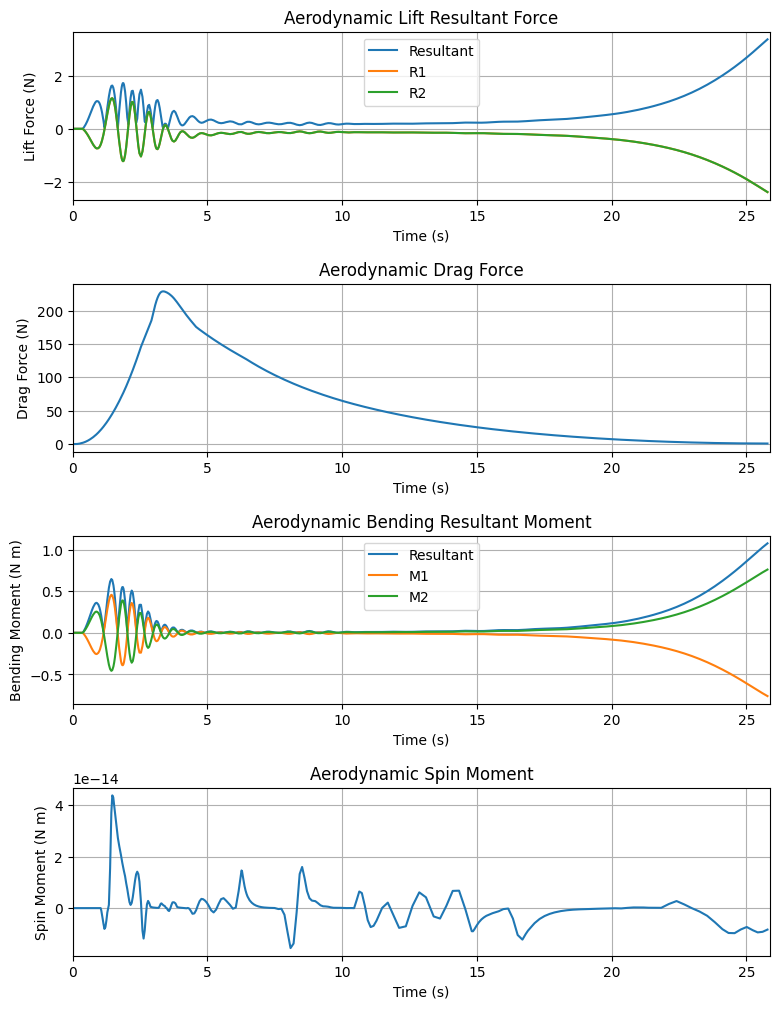



Rail Buttons Forces Plots



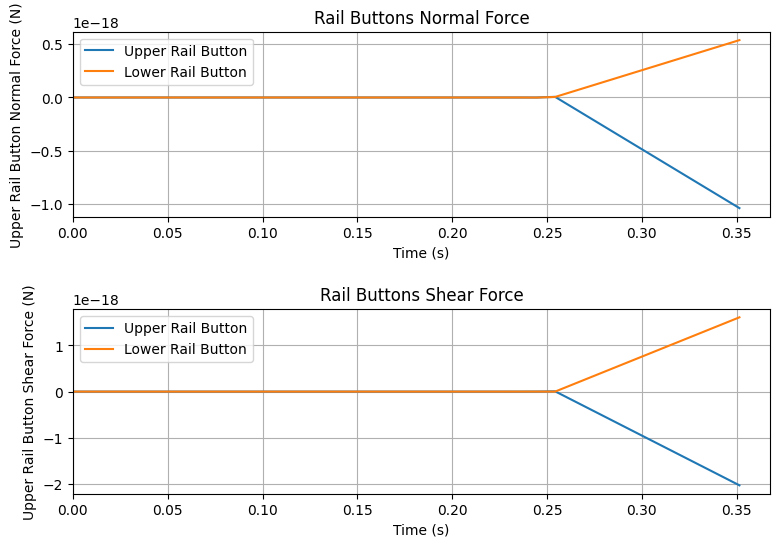



Trajectory Energy Plots



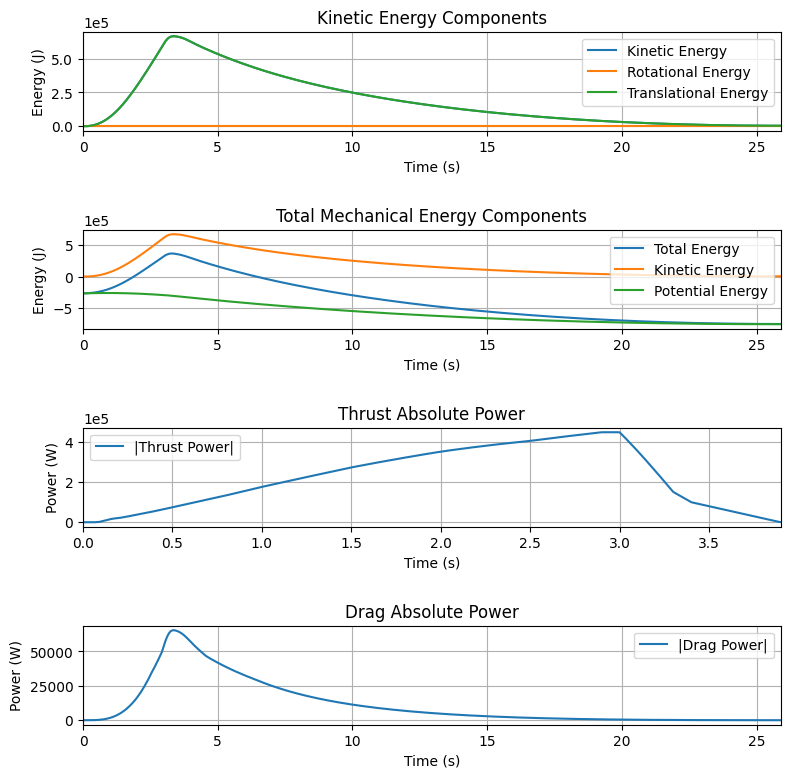



Trajectory Fluid Mechanics Plots



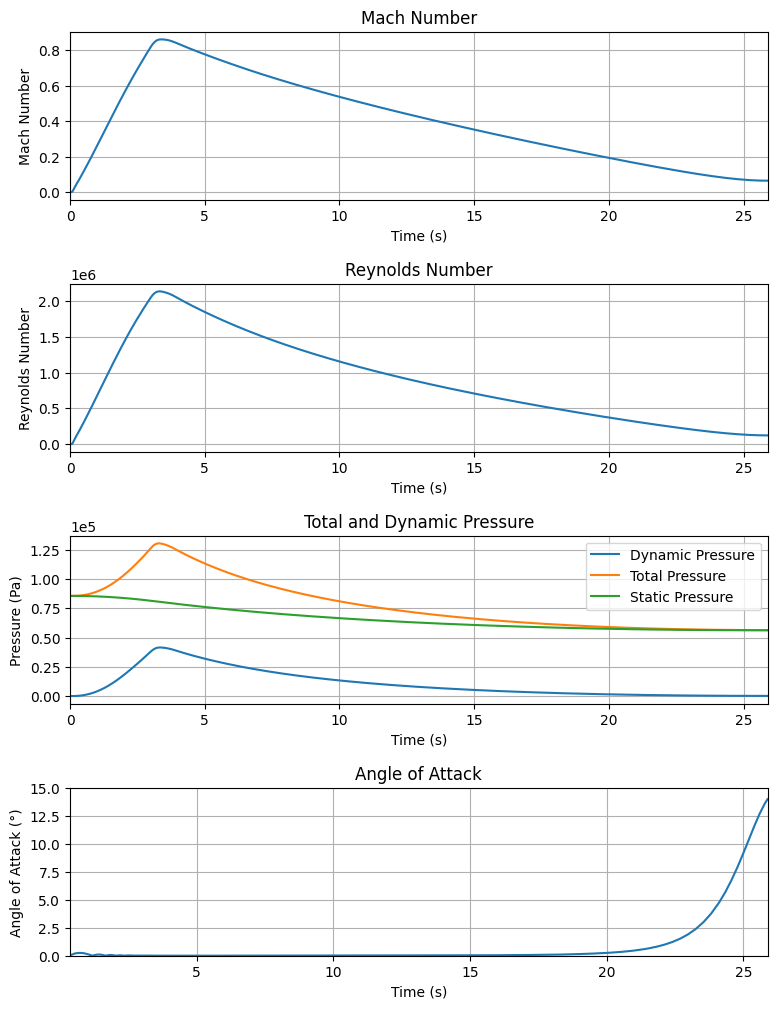



Trajectory Stability and Control Plots



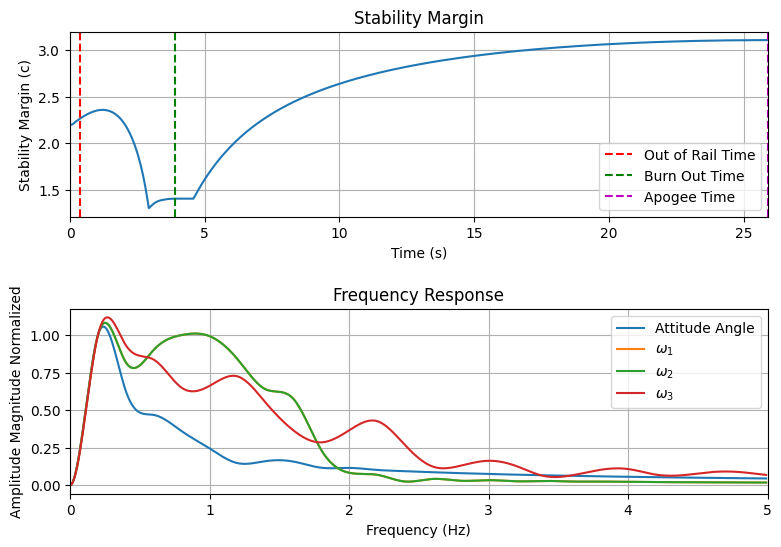



Rocket and Parachute Pressure Plots



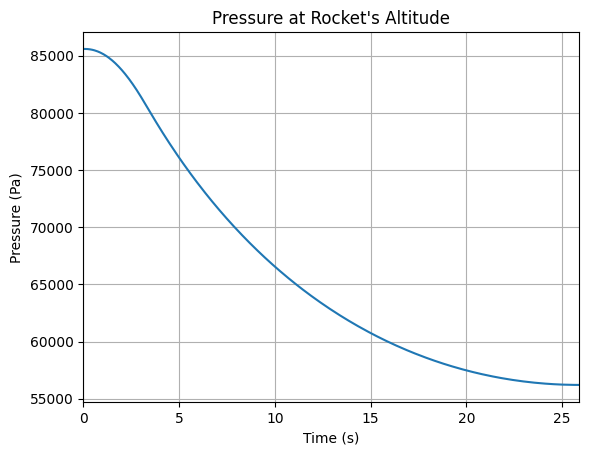


Rocket has no parachutes. No parachute plots available


In [84]:
test_flight.all_info()

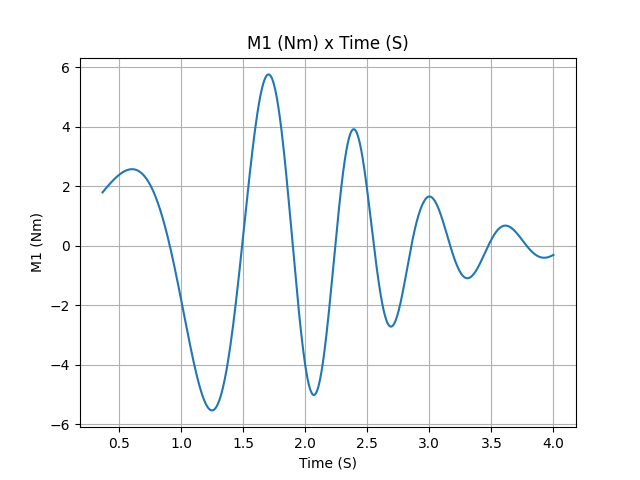

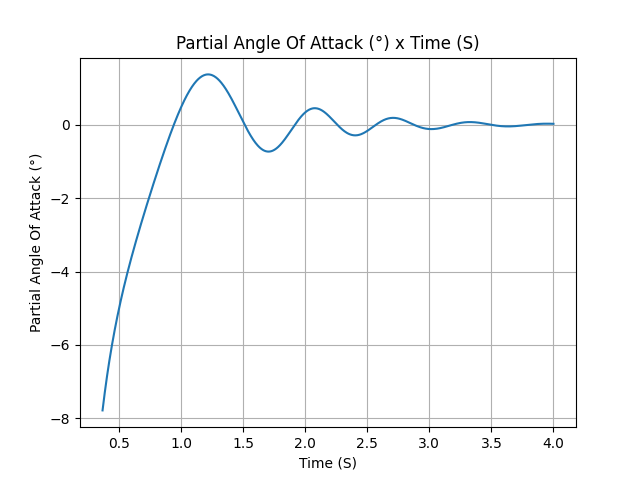

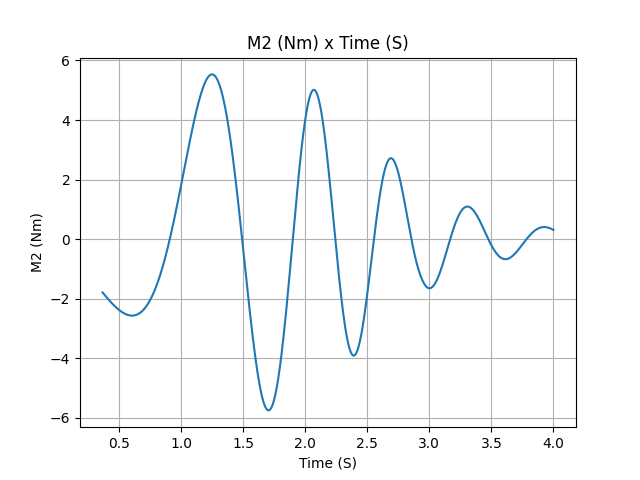

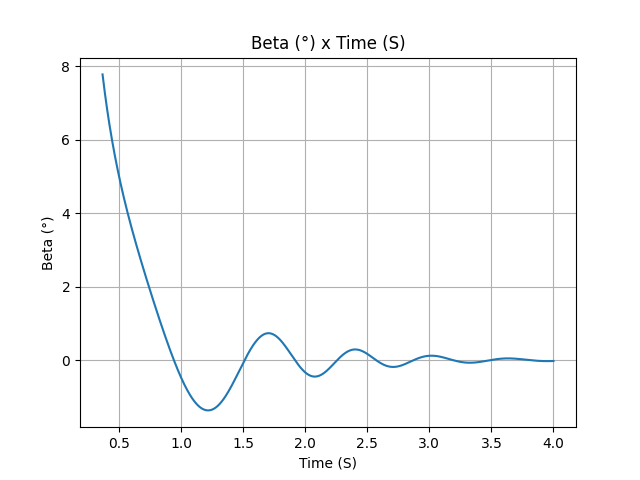

In [26]:
test_flight.M1.plot(test_flight.out_of_rail_time, 4)
test_flight.partial_angle_of_attack.plot(test_flight.out_of_rail_time, 4)
# test_flight.partial_angle_of_attack2.plot(test_flight.out_of_rail_time,4)
test_flight.M2.plot(test_flight.out_of_rail_time, 4)
test_flight.angle_of_sideslip.plot(test_flight.out_of_rail_time, 4)
# test_flight.beta2.plot(test_flight.out_of_rail_time,4)
# test_flight.angle_of_attack2.plot(test_flight.out_of_rail_time,4)

In [ ]:
a = -1  # y
b = 2  # z
np.arctan(a / b), np.arctan2(a, b), np.arctan2(a, b) - np.pi, np.arctan2(a, b) + np.pi

In [ ]:
a = -1  # x
b = -2  # z
np.arctan(-a / b), np.arctan2(-a, b), np.arctan2(a, b) - np.pi, np.arctan2(a, b) + np.pi

In [ ]:
test_flight.angle_of_attack.plot(test_flight.out_of_rail_time, 4)

In [ ]:
test_flight.angle_of_attack.plot(test_flight.out_of_rail_time, 0)
test_flight.angle_of_attack2.plot(0, 0.2)
test_flight.partial_angle_of_attack.plot(0, 3)
test_flight.beta.plot(0, 0.2)

In [ ]:
test_flight.all_info()

In [ ]:
from rocketpy import Function
from rocketpy.mathutils import Matrix
import numpy as np

Kt = []
for i, t in enumerate(test_flight.time):
    Kt.append(
        Matrix.transformation(
            [
                test_flight.e0.y_array[i],
                test_flight.e1.y_array[i],
                test_flight.e2.y_array[i],
                test_flight.e3.y_array[i],
            ]
        ).transpose
    )
Kt = np.array(Kt)
free_stream_speed = np.array(
    [
        test_flight.stream_velocity_x.y_array,
        test_flight.stream_velocity_y.y_array,
        test_flight.stream_velocity_z.y_array,
    ]
).transpose()
free_stream_speed_body = np.squeeze(np.matmul(Kt, free_stream_speed[:, :, np.newaxis]))
free_stream_speed_body_x = free_stream_speed_body[:, 0]

alpha = np.arctan(
    free_stream_speed_body[:, 0] / free_stream_speed_body[:, 2]
)  # X-Z plane
# alpha = np.nan_to_num(alpha)
Function(np.column_stack([test_flight.time, np.rad2deg(alpha)])).plot(
    test_flight.out_of_rail_time, 10
)

In [ ]:
from rocketpy import Function
from rocketpy.mathutils import Matrix
import numpy as np

Kt = []
for i, t in enumerate(test_flight.time):
    Kt.append(
        Matrix.transformation(
            [
                test_flight.e0.y_array[i],
                test_flight.e1.y_array[i],
                test_flight.e2.y_array[i],
                test_flight.e3.y_array[i],
            ]
        ).transpose
    )
Kt = np.array(Kt)
free_stream_speed = np.array(
    [
        test_flight.stream_velocity_x.y_array,
        test_flight.stream_velocity_y.y_array,
        test_flight.stream_velocity_z.y_array,
    ]
).transpose()
free_stream_speed_body = np.squeeze(np.matmul(Kt, free_stream_speed[:, :, np.newaxis]))

alpha = np.arctan(
    free_stream_speed_body[:, 0] / free_stream_speed_body[:, 2]
)  # X-Z plane
# alpha = np.nan_to_num(alpha)
Function(np.column_stack([test_flight.time, np.rad2deg(alpha)])).plot(
    test_flight.out_of_rail_time, 10
)

In [ ]:
# Example arrays (you would replace these with your actual data)
matrices = np.random.rand(707, 3, 3)  # Shape (707, 3, 3)
vectors = np.random.rand(707, 3)  # Shape (707, 3)

# Multiply each 3x3 matrix with its corresponding 3x1 vector
result = np.matmul(matrices, vectors[:, :, np.newaxis])

# The result will be of shape (707, 3, 1)
print(result.shape)  # Output: (707, 3, 1)

In [ ]:
dot_product = -(
    test_flight.attitude_vector_x.y_array * test_flight.stream_velocity_x.y_array
    + test_flight.attitude_vector_y.y_array * test_flight.stream_velocity_y.y_array
    + test_flight.attitude_vector_z.y_array * test_flight.stream_velocity_z.y_array
)

# Define freestream speed list
free_stream_speed = test_flight.free_stream_speed.y_array
# free_stream_speed = np.nan_to_num(test_flight.free_stream_speed.y_array)

# Normalize dot product
dot_product_normalized = np.divide(
    dot_product,
    free_stream_speed,
    out=np.zeros_like(dot_product),
    where=free_stream_speed > 1e-6,
)
# dot_product_normalized = np.nan_to_num(dot_product_normalized)
dot_product_normalized = np.clip(dot_product_normalized, -1, 1)

# Calculate angle of attack and convert to degrees
angle_of_attack = np.rad2deg(np.arccos(dot_product_normalized))

Function(np.column_stack([test_flight.time, angle_of_attack])).plot(
    test_flight.out_of_rail_time, 10
)

In [ ]:
alpha = np.arccos(
    -test_flight.stream_velocity_z.source[:, 1]
    / test_flight.free_stream_speed.source[:, 1]
)
Function(np.column_stack([test_flight.time, np.rad2deg(alpha)])).plot(
    test_flight.out_of_rail_time, 10
)
test_flight.angle_of_attack.plot(test_flight.out_of_rail_time, 10)

In [ ]:
test_flight.R1.plot(test_flight.out_of_rail_time, 15)

In [ ]:
%matplotlib inline
test_flight.angle_of_attack.plot(test_flight.out_of_rail_time, 10)

In [ ]:
test_flight.partial_angle_of_attack.plot(test_flight.out_of_rail_time, 20)

In [ ]:
test_flight.beta.plot(test_flight.out_of_rail_time, 10)

In [ ]:
test_flight.angle_of_attack3.plot(test_flight.out_of_rail_time, 10)
test_flight.angle_of_attack2.plot(test_flight.out_of_rail_time, 10)

## Analyzing the Results

RocketPy gives you many plots, thats for sure! They are divided into sections to keep them organized. Alternatively, see the Flight class documentation to see how to get plots for specific variables only, instead of all of them at once.


In [ ]:
test_flight.all_info()

In [ ]:
%matplotlib inline
calisto.static_margin.plot(0, 10)
test_flight.stability_margin.plot(0, 10)
test_flight.speed.plot(0, 10)

Export Flight Trajectory to a .kml file so it can be opened on Google Earth


In [ ]:
test_flight.export_kml(
    file_name="trajectory.kml",
    extrude=True,
    altitude_mode="relative_to_ground",
)

In [ ]:
import csv
from rocketpy import Function


def __load_csv(file_path, coeff_name):
    """Load CSV data, validate it, and create an interpolation function for varying parameters."""
    try:
        with open(file_path, mode='r') as file:
            reader = csv.reader(file)
            header = next(reader)  # Read only the first row (the header)
    except Exception as e:
        raise ValueError(f"Could not read CSV file for {coeff_name}: {e}")

    if not header:
        raise ValueError(f"CSV file for {coeff_name} is empty or invalid.")

    # Check what columns are present in the file
    independent_vars = ['alpha', 'beta', 'mach', 'height']
    present_columns = [col for col in independent_vars if col in header[0]]

    # last column should not be an independent variable
    # check if the last column is a dependent variable
    # does not matter the name of the last column
    # raise an error if the last column is an independent variable
    if header[-1] in independent_vars:
        raise ValueError(
            f"Last column in {coeff_name} CSV must be the coefficient value."
        )

    # Get number of independent variables present
    num_independent_vars = len(present_columns)

    csv_func = Function(file_path, interpolation='linear', extrapolation='natural')

    # create mask presence of each independent variable
    # should [1, 1, 1, 0] for alpha, beta, mach and no height
    mask = [1 if col in present_columns else 0 for col in independent_vars]
    if mask == [1, 0, 0, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(alpha),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
            extrapolation="natural",
        )
    elif mask == [1, 1, 0, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(alpha, beta),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [1, 1, 1, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(alpha, beta, mach),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [1, 1, 1, 1]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(alpha, beta, mach, height),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 1, 0, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(beta),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 1, 1, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(beta, mach),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 1, 1, 1]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(beta, mach, height),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 0, 1, 0]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(mach),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 0, 1, 1]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(mach, height),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    elif mask == [0, 0, 0, 1]:
        func = Function(
            lambda alpha, beta, mach, height: csv_func(height),
            ["alpha", "beta", "mach", "height"],
            [coeff_name],
        )
    else:
        raise ValueError(f"Invalid independent variables in {coeff_name} CSV.")

    return func


f = __load_csv("a.csv", "CCCXXX")
f(5, 10, 10, 10)

In [ ]:
import csv
from rocketpy import Function


def __load_csv(file_path, coeff_name):
    """Load CSV data, validate it, and create an interpolation function for varying parameters."""
    try:
        with open(file_path, mode='r') as file:
            reader = csv.reader(file)
            header = next(reader)  # Read only the first row (the header)
    except Exception as e:
        raise ValueError(f"Could not read CSV file for {coeff_name}: {e}")

    if not header:
        raise ValueError(f"CSV file for {coeff_name} is empty or invalid.")

    # Define possible independent variables
    independent_vars = ['alpha', 'beta', 'mach', 'height']
    present_columns = [col for col in independent_vars if col in header]

    # Check that the last column is not an independent variable
    if header[-1] in independent_vars:
        raise ValueError(
            f"Last column in {coeff_name} CSV must be the coefficient value, not an independent variable."
        )

    # Ensure that at least one independent variable is present
    if not present_columns:
        raise ValueError(f"No independent variables found in {coeff_name} CSV.")

    # Initialize the CSV-based function
    csv_func = Function(file_path, interpolation='linear', extrapolation='natural')

    # Create a mask for the presence of each independent variable
    mask = [1 if col in present_columns else 0 for col in independent_vars]

    # Generate a lambda that applies only the relevant arguments to csv_func
    def wrapper(alpha, beta, mach, height):
        args = [alpha, beta, mach, height]
        # Select arguments that correspond to present variables
        selected_args = [arg for arg, m in zip(args, mask) if m]
        return csv_func(*selected_args)

    # Create the interpolation function
    func = Function(wrapper, independent_vars, [coeff_name], extrapolation='natural')

    return func


f = __load_csv("a.csv", "cx")
f(3, 100, 10, 1000)

In [ ]:
from inspect import signature, Parameter


def a(bb, cc, *args):
    return 0


# Get the signature of the function
sig = signature(a)

# Check if any of the parameters are VAR_POSITIONAL, which corresponds to *args
for param in sig.parameters.values():
    if param.kind == Parameter.VAR_POSITIONAL:
        r = True
r

In [ ]:
a = [1, 0, 1, 0]
b = ['alpha', 'beta', 'mach', 'height']
# apply the mask to the list of variables
selected_args = [arg for arg, m in zip(b, a) if m]
selected_args

## Using Simulation for Design

Here, we go through a couple of examples which make use of RocketPy in cool ways to help us design our rocket.


### Apogee as a Function of Mass

This one is a classic one! We always need to know how much our rocket's apogee will change when our payload gets heavier.


In [ ]:
from rocketpy.utilities import apogee_by_mass

apogee_by_mass(flight=test_flight, min_mass=5, max_mass=20, points=10, plot=True)

### Out of Rail Speed as a Function of Mass

Lets make a really important plot. Out of rail speed is the speed our rocket has when it is leaving the launch rail. This is crucial to make sure it can fly safely after leaving the rail. A common rule of thumb is that our rocket's out of rail speed should be 4 times the wind speed so that it does not stall and become unstable.


In [ ]:
from rocketpy.utilities import liftoff_speed_by_mass

liftoff_speed_by_mass(flight=test_flight, min_mass=5, max_mass=20, points=10, plot=True)

### Dynamic Stability Analysis

Ever wondered how static stability translates into dynamic stability? Different static margins result in different dynamic behavior, which also depends on the rocket's rotational inertial.

Let's make use of RocketPy's helper class called Function to explore how the dynamic stability of Calisto varies if we change the fins span by a certain factor.


In [ ]:
# Helper class
from rocketpy import Function
import copy

# Prepare a copy of the rocket
calisto2 = copy.deepcopy(calisto)

# Prepare Environment Class
custom_env = Environment()
custom_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

# Simulate Different Static Margins by Varying Fin Position
simulation_results = []

for factor in [-0.5, -0.2, 0.1, 0.4, 0.7]:
    # Modify rocket fin set by removing previous one and adding new one
    calisto2.aerodynamic_surfaces.pop(-1)

    fin_set = calisto2.add_trapezoidal_fins(
        n=4,
        root_chord=0.120,
        tip_chord=0.040,
        span=0.100,
        position=-1.04956 * factor,
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            calisto2.static_margin(0),
            calisto2.static_margin(calisto2.motor.burn_out_time),
        )
    )
    test_flight = Flight(
        rocket=calisto2,
        environment=custom_env,
        rail_length=5.2,
        inclination=90,
        heading=0,
        max_time_step=0.01,
        max_time=5,
        terminate_on_apogee=True,
        verbose=True,
    )
    # Store Results
    static_margin_at_ignition = calisto2.static_margin(0)
    static_margin_at_out_of_rail = calisto2.static_margin(test_flight.out_of_rail_time)
    static_margin_at_steady_state = calisto2.static_margin(test_flight.t_final)
    simulation_results += [
        (
            test_flight.attitude_angle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                static_margin_at_ignition,
                static_margin_at_out_of_rail,
                static_margin_at_steady_state,
            ),
        )
    ]

Function.compare_plots(
    simulation_results,
    lower=0,
    upper=1.5,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)

### Characteristic Frequency Calculation

Here we analyze the characteristic frequency of oscillation of our rocket just as it leaves the launch rail. Note that when we ran test_flight.all_info(), one of the plots already showed us the frequency spectrum of our flight. Here, however, we have more control of what we are plotting.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate first 5 seconds of Flight
flight = Flight(
    rocket=calisto,
    environment=env,
    rail_length=5.2,
    inclination=90,
    heading=0,
    max_time_step=0.01,
    max_time=5,
)

# Perform a Fourier Analysis
Fs = 100.0
# sampling rate
Ts = 1.0 / Fs
# sampling interval
t = np.arange(1, 400, Ts)  # time vector
ff = 5
# frequency of the signal
y = flight.attitude_angle(t) - np.mean(flight.attitude_angle(t))
n = len(y)  # length of the signal
k = np.arange(n)
T = n / Fs
frq = k / T  # two sides frequency range
frq = frq[range(n // 2)]  # one side frequency range
Y = np.fft.fft(y) / n  # fft computing and normalization
Y = Y[range(n // 2)]

# Create the plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Signal")
ax[0].set_xlim((0, 5))
ax[0].grid()
ax[1].plot(frq, abs(Y), "r")  # plotting the spectrum
ax[1].set_xlabel("Freq (Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].set_xlim((0, 5))
ax[1].grid()
plt.subplots_adjust(hspace=0.5)
plt.show()